<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Simul1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Puntos 1 y 3


=== Tabla comparativa numérica ===
   Intervalo  Simulación (a)  Simulación (b)  Diferencia (b-a)
0      [6,7)            0.02            0.02               0.0
1      [7,8)            0.04            0.04               0.0
2      [8,9)            0.11            0.11               0.0
3     [9,10)            0.05            0.05               0.0
4    [10,11)            0.10            0.10               0.0
5    [11,12)            0.15            0.15               0.0
6    [12,13)            0.14            0.14               0.0
7    [13,14)            0.15            0.15               0.0
8    [14,15)            0.11            0.11               0.0
9    [15,16)            0.09            0.09               0.0
10   [16,17)            0.01            0.01               0.0
11   [17,18)            0.03            0.03               0.0

Suma método (a): 1.0
Suma método (b): 1.0


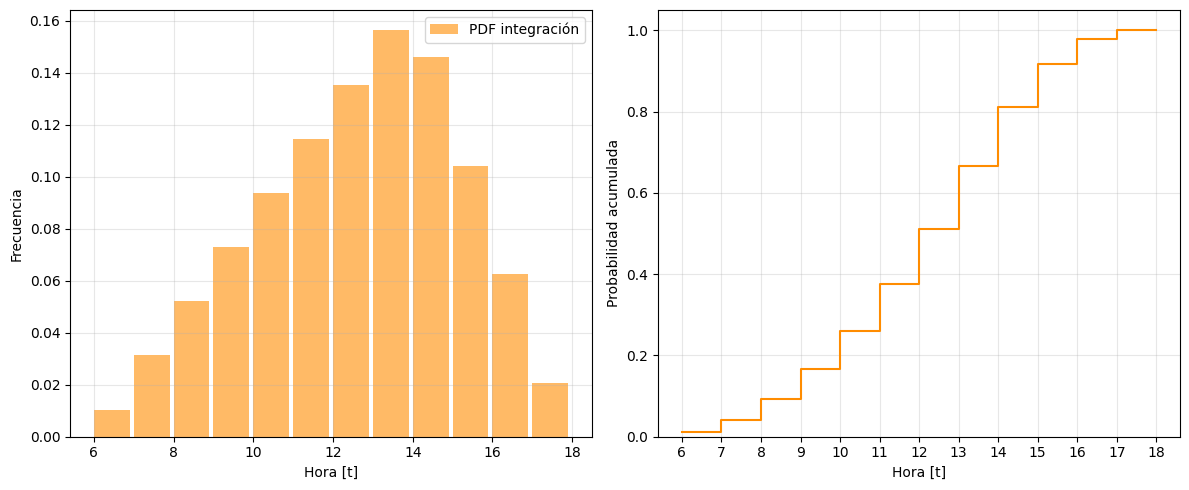

In [36]:
# Simulación de lluvia en Bogotá – Punto 1

import numpy as np
import matplotlib.pyplot as plt
import random as rn
import pandas as pd


intervalos = np.arange(6, 18)
fmax = 1/6

def f(t):
  if 6 <= t <= 14:
    return (fmax/8)*(t-6)
  elif 14 < t <= 18:
    return (fmax/4)*(18-t)
  else:
    return 0

# (a) Medias horas
p_mid = []
for n in intervalos:
    mid = n + 0.5                   # la hora y media
    p_mid.append(f(mid))            # meto a la lista la densidad de probabilidad evaluada en las medias horas
p_mid = np.array(p_mid)             # de lista a array
p_mid /= p_mid.sum()                # normalizo

pdf_mid = np.insert(p_mid, 0, 0)

# (b) Integral
p_int = []
for n in intervalos:
    t1, t2 = n, n+1
    val = (f(t1) + f(t2))/2 * (t2 - t1)   # método del trapecio (como tenemos histogramas creo que esto da como exacto)
    p_int.append(val)
p_int = np.array(p_int)
p_int /= p_int.sum()

pdf_int = np.insert(p_int, 0, 0)


def acumulada(pdf):                   # Función acumulada para hacer la simulación con aleatorios (como antes)
    F = np.zeros(len(pdf))
    for i in range(1, len(pdf)):
        F[i] = F[i-1] + pdf[i]
    return F

F_mid = acumulada(pdf_mid)
F_int = acumulada(pdf_int)


def aleato(lista, F):
    histograma = np.array([0]*len(F))
    for r in lista:
        for j in np.arange(1, len(F)):
            if r >= F[j-1] and r < F[j]:
                histograma[j] += 1
                break
    return histograma[1:]                 # empiezo no desde el índice ficticio sino desde el primer intervalo

N = 100
rn.seed(123)
lista = [rn.random() for _ in range(N)] # para darle la misma secuencia de aleatorios a ambos métodos

hist_mid = aleato(lista, F_mid)
hist_int = aleato(lista, F_int)

tabla = pd.DataFrame({                                      # esta tablita para ver la diferencia entre los métodos de forma numérica
    "Intervalo": [f"[{n},{n+1})" for n in intervalos],
    "Simulación (a)": hist_mid/N,
    "Simulación (b)": hist_int/N,
    "Diferencia (b-a)": np.abs(hist_mid - hist_int)/N,
})

print("\n=== Tabla comparativa numérica ===")
print(tabla)
print("\nSuma método (a):", p_mid.sum())          # para ver que los métodos sí mantienen la densidad de probabilidad normalizada
print("Suma método (b):", p_int.sum())



bordes = np.arange(6, 19)
plt.figure(figsize=(12,5))

'''
plt.plot(intervalos, p_mid, 'ro-', label="PDF teórica (a)")
plt.plot(intervalos, p_int, 'bs--', label="PDF teórica (b)")
'''


# Descomentar esto para punto 1 y comentar para hacer el 3
'''
t_vals = np.linspace(6, 18, 500)
f_vals = [f(t) for t in t_vals]
plt.plot(t_vals, f_vals, linewidth=2,color='black', label="f(t) teórica")

plt.bar(bordes[:-1], hist_mid/N, width=0.95,
        align='edge', color='palevioletred', alpha=0.6, label="Medias horas")
plt.bar(bordes[:-1], hist_int/N, width=0.5,
        align='edge', color='darkorange', alpha=0.4, label="Integración")
#plt.bar(intervalos-0.15, hist_mid/N, width=0.3,color='palevioletred', alpha=0.6, label="Medias horas")
#plt.bar(intervalos+0.15, hist_int/N, width=0.3,color='darkorange', alpha=0.4, label="Integración")


plt.xlabel("Hora [t]")
plt.ylabel("Frecuencia")
#plt.title(f"Simulación de lluvia en {N} días: comparación métodos (a) y (b)")
plt.xticks(range(6,19))
plt.legend()
plt.grid(alpha=0.3)
'''

# Aquí las cositas del punto 3, se comenta con """ para quitar el plot


# Densidad de probabilidad
plt.subplot(1,2,1)
plt.bar(bordes[:-1], p_int, width=0.9, color='darkorange',align='edge',
        alpha=0.6, label="PDF integración")
plt.xlabel("Hora [t]")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(alpha=0.3)


# Función acumulativa
plt.subplot(1,2,2)

x_vals = np.append(intervalos, 18)
F_vals = np.append(F_int[1:], 1.0)

plt.step(x_vals, F_vals, where="post", color="darkorange", linestyle="-")
plt.xlabel("Hora [t]")
plt.ylabel("Probabilidad acumulada")
plt.ylim(0,1.05)
plt.xticks(range(6,19))
plt.grid(alpha=0.3)



plt.tight_layout()
plt.show()

#Puntos 4 y 5
Histogramas para distinto número de días

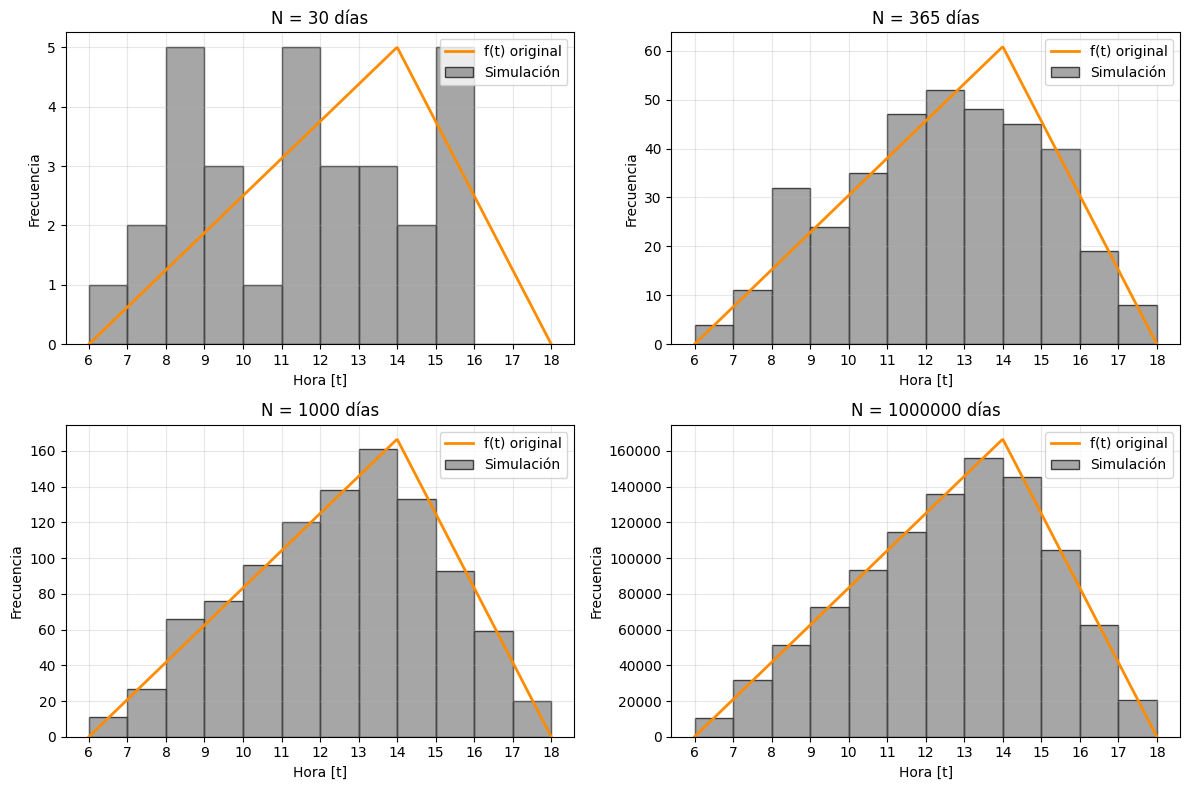

In [39]:
# Simulación de lluvia en Bogotá - cuarto punto

import numpy as np
import matplotlib.pyplot as plt
import random as rn


intervalos = np.arange(6, 18)
fmax = 1/6

def f(t):
  if 6 <= t <= 14:
    return (fmax/8)*(t-6)
  elif 14 < t <= 18:
    return (fmax/4)*(18-t)
  else:
    return 0

# (a) Medias horas
p_mid = []
for n in intervalos:
    mid = n + 0.5                   # la hora y media
    p_mid.append(f(mid))            # meto a la lista la densidad de probabilidad evaluada en las medias horas
p_mid = np.array(p_mid)             # de lista a array
p_mid /= p_mid.sum()                # normalizo

pdf_mid = np.insert(p_mid, 0, 0)
dim_pdf = len(pdf_mid)
F = np.zeros(dim_pdf)

for i in np.arange(1, dim_pdf):
    F[i] = F[i-1] + pdf_mid[i]


def lluviasim(N, seed=123):
    histograma = np.array([0]*dim_pdf)
    rn.seed(seed)
    for i in range(N):
        r = rn.random()
        for j in np.arange(1, dim_pdf):
            if r >= F[j-1] and r < F[j]:
                bingo = j
                break
        histograma[bingo] += 1
    return histograma[1:]


N_vals = [30, 365, 1000, 10**6]               # número de días que pide el ejercicio
resultados = [lluviasim(N) for N in N_vals]

t_vals = np.linspace(6, 18, 500)
f_vals = np.array([f(t) for t in t_vals])

fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()

for i, N in enumerate(N_vals):
    axs[i].bar(intervalos, resultados[i], width=1, align="edge", alpha=0.7,
               edgecolor='black', color='grey', label='Simulación')


    axs[i].plot(t_vals, f_vals * N, linewidth=2, color='darkorange', label="f(t) original")  # escalo f(t) para comparar con los histogramas

    axs[i].set_title(f"N = {N} días")
    axs[i].set_xlabel("Hora [t]")
    axs[i].set_ylabel("Frecuencia")
    axs[i].set_xticks(range(6, 19))
    axs[i].legend()
    axs[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#Segunda parte
Puede NO llover

N=30: llovió 22 días, no llovió 8, total=30
N=100: llovió 73 días, no llovió 27, total=100


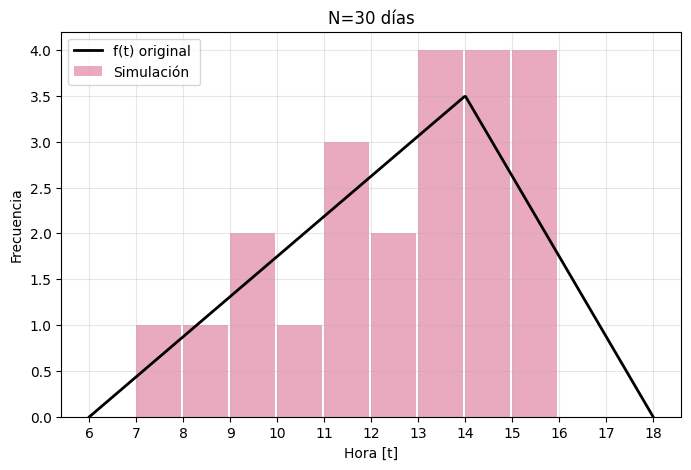

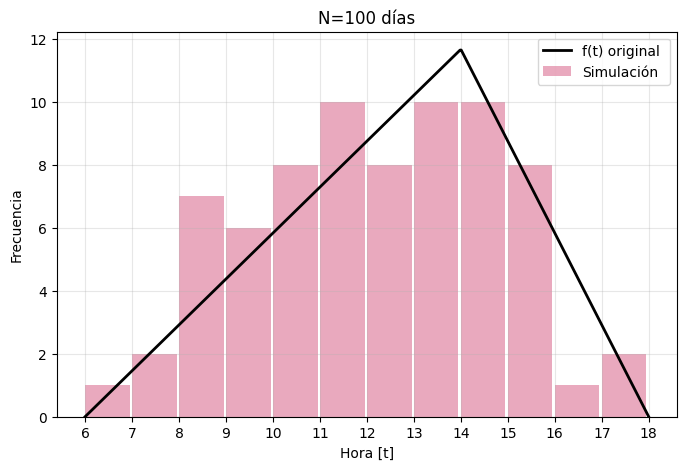

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import pandas as pd

intervalos = np.arange(6, 18)
fmax = 1/6

def f(t):
    if 6 <= t <= 14:
        return (fmax/8)*(t-6)
    elif 14 < t <= 18:
        return (fmax/4)*(18-t)
    else:
        return 0

# (a) Medias horas
p_mid = []
for n in intervalos:
    mid = n + 0.5
    p_mid.append(f(mid))
p_mid = np.array(p_mid)
p_mid /= p_mid.sum()
pdf_mid = np.insert(p_mid, 0, 0)

# (b) Integral
p_int = []
for n in intervalos:
    t1, t2 = n, n+1
    val = (f(t1) + f(t2))/2 * (t2 - t1)
    p_int.append(val)
p_int = np.array(p_int)
p_int /= p_int.sum()
pdf_int = np.insert(p_int, 0, 0)


def acumulada(pdf):
    F = np.zeros(len(pdf))
    for i in range(1, len(pdf)):
        F[i] = F[i-1] + pdf[i]
    return F

F_mid = acumulada(pdf_mid)
F_int = acumulada(pdf_int)


def aleato(lista, F):
    histograma = np.array([0]*len(F))
    for r in lista:
        for j in np.arange(1, len(F)):
            if r >= F[j-1] and r < F[j]:
                histograma[j] += 1
                break
    return histograma[1:]


p_lluvia = 0.7        # probabilidad de éxito (lluvia)


def simlluvia(N, F, p_lluvia=0.7, seed=123):      # ahora incluyo la probabilidad de que llueva
    rn.seed(seed)
    histograma = np.zeros(len(F)-1, dtype=int)
    d_lluvia, d_secos = 0, 0                      # inicio el contador

    for _ in range(N):
        r = rn.random()                           # saco un número aleatorio para determinar la probabilidad
        if r < p_lluvia:                          # si r es menor que la probabilidad de que llueva
            d_lluvia += 1                         # ese día llueve (aumento el contador)
            r2 = rn.random()                      # saco otro número aleatorio, ya que llueve debo ver en qué intervalo horario llueve
            for j in np.arange(1, len(F)):        # recorro en la acumulada para asignarle un intervalo al número (como en la primera parte del ejercicio)
                if r2 >= F[j-1] and r2 < F[j]:
                    histograma[j-1] += 1          # le sumo al histograma día a día
                    break
        else:                                     # si se cumple que r no es menor que la probabilidad de lluvia, NO llueve
            d_secos += 1                          # ese día no llueve, (aumento el contador para días no lluviosos)

    return histograma, d_lluvia, d_secos

# PUNTO 7, simular la determinación de la hora a la que llueve (como en la primera parte), pero ahora con la probabilidad adicional de que puede NO llover
N_vals = [30, 100]            # días a probar
resultados = []               # lista para guardar los datos de la simulación
for N in N_vals:
    hist, lluvia, seco = simlluvia(N, F_int, p_lluvia)    # corro la simulación de lluvia con nueva probabilidad
    resultados.append((hist, lluvia, seco))               # guardo los datos en la lista

# PUNTO 8, reportar cuántos días llovió, cuántos no, y verificar que la suma de ambos es el total (30 o 100)
    print(f"N={N}: llovió {lluvia} días, no llovió {seco}, total={lluvia+seco}")

# El punto 7 manda a hacer un histograma hora por hora (como en los primeros puntos)

bordes = np.arange(6, 19)

for i, N in enumerate(N_vals):
    hist, lluvio, seco = resultados[i]

    plt.figure(figsize=(8,5))
    plt.bar(bordes[:-1], hist, width=0.95, align="edge",
            color="palevioletred", alpha=0.6, label="Simulación")

    # PUNTO 9, verificar que el resultado de la simulación sigue la teórica

    t_vals = np.linspace(6, 18, 500)
    f_vals = [f(t) for t in t_vals]     # la f(t) que hemos usado todo el rato

    # Ajusto a frecuencias esperadas (para que compare con histograma)
    f_vals = np.array(f_vals)
    #f_vals /= f_vals.sum()            # podría normalizar pero si también normalizo el histograma
    f_vals = N * p_lluvia * f_vals     # paso de probabilidad a frecuencias absolutas, debo tener en cuenta la nueva probabilidad de lluvia

    plt.plot(t_vals, f_vals, 'k-', linewidth=2,
         label="f(t) original ")


    plt.title(f"N={N} días")
    plt.xlabel("Hora [t]")
    plt.ylabel("Frecuencia")
    plt.xticks(range(6,19))
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
